In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore",category=FutureWarning)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
df.drop(["Id"],axis=1,inplace=True)

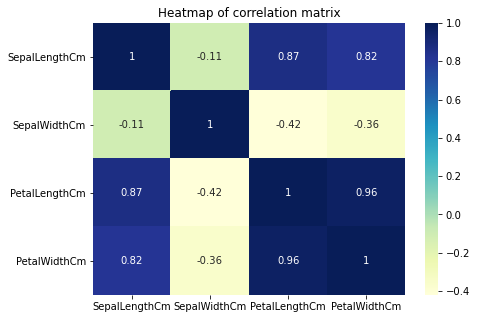

In [10]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Heatmap of correlation matrix")
plt.show()

We can see that PetalWidth and PetalLenght are highly correlated.

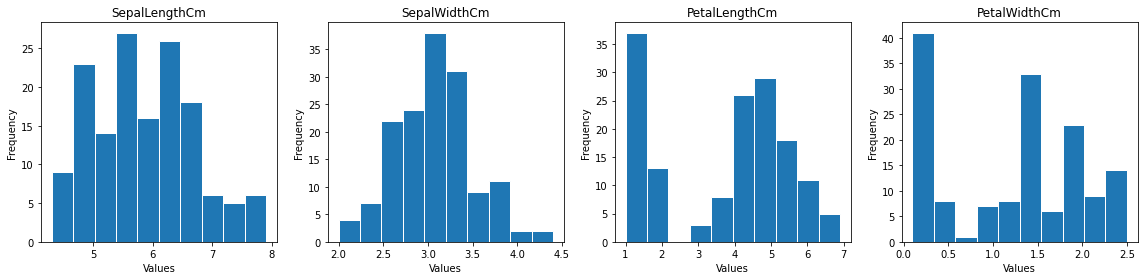

In [11]:
#axes is a list of axes objects
#axes[i] is used to select the specific subplot (axis) from the axes list at the current index i
#enumerate is used to iterate over an iterable 
col_exc="Species"
col_plot=[col for col in df.columns if col!=col_exc]
fig,axes=plt.subplots(nrows=1,ncols=len(col_plot),figsize=(16,4))
for i, column in enumerate(col_plot):
    df[column].plot(kind="hist",ax=axes[i],edgecolor="white")
    axes[i].set_title(column) 
    axes[i].set_xlabel("Values")
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [12]:
#FacetGrid- create scatter plots
#sns.set(style="whitegrid")- white background grid in scatter plots
#g.map()- line maps the scatter plot function (plt.scatter) onto the FacetGrid 
#plt.scatter()-  scatter plot function
#hue -each species will be represented with a different color in the scatter plots
def create_scatter_plots(df, x_column, y_column):
    sns.set(style="whitegrid")
    g = sns.FacetGrid(df, hue="Species", height=6)
    g.map(plt.scatter, x_column, y_column).add_legend()
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot: {x_column} vs. {y_column}')
    plt.show()

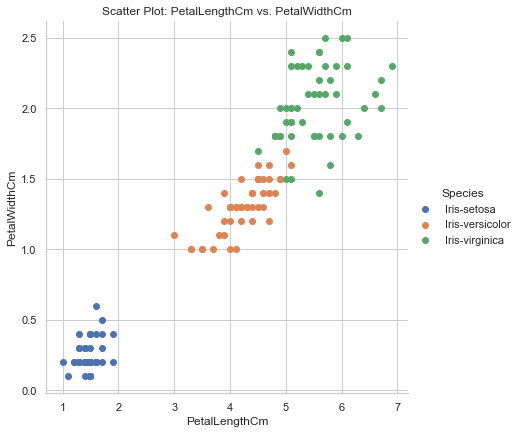

In [13]:
create_scatter_plots(df, 'PetalLengthCm', 'PetalWidthCm')

In [14]:
col_violin=[col for col in df.columns if col!="Species"]
def create_violin_plots(df, x_column,y_column):
    sns.set(style="whitegrid")
    sns.violinplot(x=x_column,y=y_column,data=df,split=True)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot: {x_column} vs {y_column}')
    plt.show()

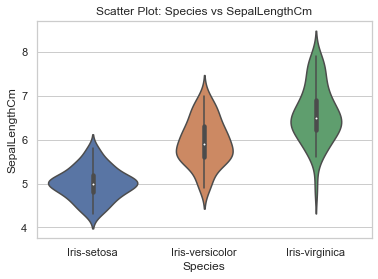

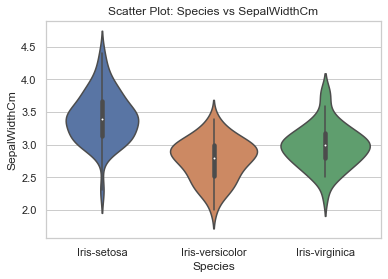

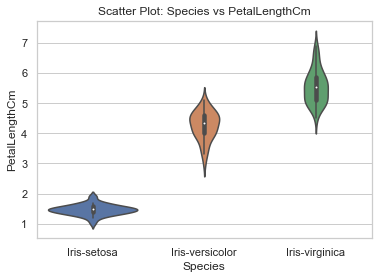

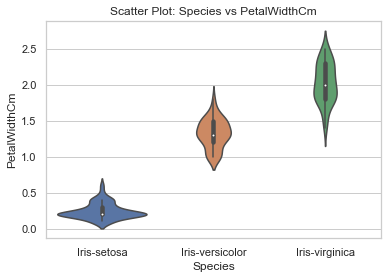

In [15]:
for i in col_violin:
    create_violin_plots(df,"Species",i)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [17]:
X=df.drop("Species",axis=1)
y=df.Species

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=42) 

In [19]:
classification={
    "Decision Tree": DecisionTreeClassifier(),
    "Kneighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
result=pd.DataFrame(columns=["accuracy"])
for method,func in classification.items():
    func.fit(X_train,y_train)
    y_pred=func.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    result.loc[method]=[accuracy]
result

,accuracy
Decision Tree,0.966667
Kneighbors,0.983333
Gradient Boosting,0.983333
